# Introduction to DataFrames
**[Bogumił Kamiński](http://bogumilkaminski.pl/about/), February 13, 2023**

In [1]:
using DataFrames

## Getting basic information about a data frame

Let's start by creating a `DataFrame` object, `x`, so that we can learn how to get information on that data frame.

In [2]:
x = DataFrame(A = [1, 2], B = [1.0, missing], C = ["a", "b"])

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,2,missing,b


The standard `size` function works to get dimensions of the `DataFrame`,

In [3]:
size(x), size(x, 1), size(x, 2)

((2, 3), 2, 3)

as well as `nrow` and `ncol` from R.

In [4]:
nrow(x), ncol(x)

(2, 3)

`describe` gives basic summary statistics of data in your `DataFrame` (check out the help of `describe` for information on how to customize shown statistics).

In [5]:
describe(x)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,A,1.5,1,1.5,2,0,Int64
2,B,1.0,1.0,1.0,1.0,1,"Union{Missing, Float64}"
3,C,,a,,b,0,String


you can limit the columns shown by `describe` using `cols` keyword argument

In [6]:
describe(x, cols=1:2)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,Type
1,A,1.5,1,1.5,2,0,Int64
2,B,1.0,1.0,1.0,1.0,1,"Union{Missing, Float64}"


`names` will return the names of all columns as strings

In [7]:
names(x)

3-element Vector{String}:
 "A"
 "B"
 "C"

you can also get column names with a given `eltype`:

In [8]:
names(x, String)

1-element Vector{String}:
 "C"

use `propertynames` to get a vector of `Symbol`s:

In [9]:
propertynames(x)

3-element Vector{Symbol}:
 :A
 :B
 :C

using `eltype` on `eachcol(x)` returns element types of columns:

In [10]:
eltype.(eachcol(x))

3-element Vector{Type}:
 Int64
 Union{Missing, Float64}
 String

Here we create some large `DataFrame`

In [11]:
y = DataFrame(rand(1:10, 1000, 10), :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2,9,4,5,3,9,9,2,2,8
2,7,6,5,8,4,2,7,3,2,3
3,3,2,9,8,2,5,1,4,7,10
4,5,6,3,1,3,2,4,8,2,1
5,8,4,2,2,4,2,9,7,3,1
6,4,8,8,4,1,5,6,3,8,6
7,8,5,1,1,1,7,8,6,8,5
8,3,3,9,6,6,5,5,2,1,6
9,2,1,5,3,5,10,9,4,4,7


and then we can use `first` to peek into its first few rows

In [12]:
first(y, 5)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2,9,4,5,3,9,9,2,2,8
2,7,6,5,8,4,2,7,3,2,3
3,3,2,9,8,2,5,1,4,7,10
4,5,6,3,1,3,2,4,8,2,1
5,8,4,2,2,4,2,9,7,3,1


and `last` to see its bottom rows.

In [13]:
last(y, 3)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,10,2,6,8,2,10,8,9,3,7
2,8,1,3,2,8,7,2,8,6,1
3,4,6,3,2,1,6,5,9,3,4


Using `first` and `last` without number of rows will return a first/last `DataFrameRow` in the `DataFrame`

In [14]:
first(y)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2,9,4,5,3,9,9,2,2,8


In [15]:
last(y)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1000,4,6,3,2,1,6,5,9,3,4


### Displaying wide data frames

Create a wide and tall data frame:

In [16]:
df = DataFrame(rand(100, 200), :auto)

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,0.800589,0.520631,0.809645,0.684632,0.730305,0.229668,0.506644,0.0567315,0.922278,0.354386,0.325685,0.612274,0.441096,0.245811,0.550838,0.428645,0.503004,0.171874,0.789244,0.189804,0.67233,0.589384,0.824691,0.180182,0.190486,0.793178,0.974488,0.452015,0.273958,0.334876,0.569658,0.970456,0.188461,0.301614,0.370001,0.265578,0.726402,0.128168,0.314791,0.985822,0.0209938,0.0429947,0.684754,0.601738,0.828557,0.440496,0.628818,0.393444,0.43968,0.885664,0.946436,0.791562,0.0930476,0.674946,0.818285,0.912116,0.525963,0.524383,0.397839,0.746288,0.1429,0.857926,0.514314,0.139064,0.076648,0.14208,0.742237,0.256211,0.854108,0.708987,0.654079,0.868797,0.46379,0.495156,0.283477,0.366115,0.495611,0.382225,0.420424,0.88158,0.0678973,0.551639,0.712055,0.862031,0.962128,0.78974,0.00666668,0.825641,0.918785,0.521414,0.949698,0.785214,0.263016,0.495631,0.50636,0.0612606,0.289994,0.498179,0.876239,0.395157,⋯
2,0.792454,0.539687,0.638338,0.317587,0.25712,0.57408,0.701946,0.579785,0.249114,0.127132,0.978639,0.392828,0.568908,0.395496,0.737063,0.509046,0.374583,0.905227,0.288437,0.051777,0.5846,0.974884,0.999818,0.6276,0.658764,0.31442,0.845545,0.318234,0.680063,0.690976,0.529663,0.273604,0.1044,0.682575,0.163342,0.455817,0.274151,0.237478,0.106557,0.348222,0.257028,0.600596,0.930427,0.414094,0.501831,0.20781,0.983219,0.922354,0.222877,0.0414462,0.0242487,0.913991,0.529717,0.510727,0.347199,0.868013,0.860727,0.529058,0.238066,0.699428,0.974643,0.974776,0.107829,0.31921,0.834583,0.337684,0.317935,0.705979,0.294931,0.465135,0.795949,0.85349,0.502169,0.138797,0.0349598,0.5765,0.349394,0.464137,0.124665,0.567256,0.623415,0.332416,0.615273,0.396437,0.167669,0.680672,0.490952,0.186524,0.717682,0.699698,0.438653,0.527789,0.827695,0.549679,0.717268,0.776862,0.395776,0.651825,0.974716,0.873791,⋯
3,0.590947,0.90727,0.340609,0.77661,0.95369,0.0467544,0.860111,0.141644,0.0439371,0.759328,0.888533,0.219864,0.10134,0.913859,0.453325,0.00559103,0.729681,0.586963,0.196746,0.68335,0.795744,0.995164,0.183859,0.607252,0.884222,0.261845,0.542955,0.182878,0.836044,0.4687,0.304262,0.146769,0.841228,0.864418,0.250909,0.729893,0.321629,0.526859,0.802301,0.149461,0.488907,0.346208,0.392273,0.859308,0.277391,0.747836,0.502413,0.541414,0.771034,0.903394,0.263061,0.0480684,0.738763,0.896476,0.764246,0.981591,0.495881,0.0685592,0.0242537,0.153185,0.347357,0.19208,0.270378,0.264432,0.341156,0.155568,0.297596,0.0615184,0.255697,0.261417,0.598361,0.0997615,0.239073,0.276969,0.0986606,0.703866,0.894894,0.880644,0.768527,0.745287,0.137539,0.592931,0.114904,0.445384,0.387289,0.452237,0.653976,0.0173606,0.433225,0.130521,0.586541,0.404991,0.604585,0.253853,0.918753,0.965589,0.561081,0.515274,0.28853,0.232241,⋯
4,0.542843,0.167519,0.191,0.927426,0.914871,0.061127,0.133722,0.847142,0.517435,0.890748,0.11977,

### Most elementary get and set operations

Given the `DataFrame` `x` we have created earlier, here are various ways to grab one of its columns as a `Vector`.

In [17]:
x

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,2,missing,b


In [18]:
x.A, x[!, 1], x[!, :A] # all get the vector stored in our DataFrame without copying it

([1, 2], [1, 2], [1, 2])

In [19]:
x."A", x[!, "A"] # the same using string indexing

([1, 2], [1, 2])

In [20]:
x[:, 1] # note that this creates a copy

2-element Vector{Int64}:
 1
 2

In [21]:
x[:, 1] === x[:, 1]

false

To grab one row as a `DataFrame`, we can index as follows.

In [22]:
x[1:1, :]

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a


In [23]:
x[1, :] # this produces a DataFrameRow which is treated as 1-dimensional object similar to a NamedTuple

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a


We can grab a single cell or element with the same syntax to grab an element of an array.

In [24]:
x[1, 1]

1

or a new `DataFrame` that is a subset of rows and columns

In [25]:
x[1:2, 1:2]

Row,A,B
,Int64,Float64?
1,1,1.0
2,2,missing


You can also use `Regex` to select columns and `Not` from InvertedIndices.jl both to select rows and columns

In [26]:
x[Not(1), r"A"]

Row,A
,Int64
1,2


In [27]:
x[!, Not(1)] # ! indicates that underlying columns are not copied

Row,B,C
,Float64?,String
1,1.0,a
2,missing,b


In [28]:
x[:, Not(1)] # : means that the columns will get copied

Row,B,C
,Float64?,String
1,1.0,a
2,missing,b


Assignment of a scalar to a data frame can be done in ranges using broadcasting:

In [29]:
x[1:2, 1:2] .= 1
x

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,1,1.0,b


Assignment of a vector of length equal to the number of assigned rows using broadcasting

In [30]:
x[1:2, 1:2] .= [1,2]
x

Row,A,B,C
,Int64,Float64?,String
1,1,1.0,a
2,2,2.0,b


Assignment or of another data frame of matching size and column names, again using broadcasting:

In [31]:
x[1:2, 1:2] .= DataFrame([5 6; 7 8], [:A, :B])
x

Row,A,B,C
,Int64,Float64?,String
1,5,6.0,a
2,7,8.0,b


**Caution**

With `df[!, :col]` and `df.col` syntax you get a direct (non copying) access to a column of a data frame.
This is potentially unsafe as you can easily corrupt data in the `df` data frame if you resize, sort, etc. the column obtained in this way.
Therefore such access should be used with caution.

Similarly `df[!, cols]` when `cols` is a collection of columns produces a new data frame that holds the same (not copied) columns as the source `df` data frame. Similarly, modifying the data frame obtained via `df[!, cols]` might cause problems with the consistency of `df`.

The `df[:, :col]` and `df[:, cols]` syntaxes always copy columns so they are safe to use (and should generally be preferred except for performance or memory critical use cases).

Here are examples of how `Cols` and `Between` can be used to select columns of a data frame.

In [32]:
x = DataFrame(rand(4, 5), :auto)

Row,x1,x2,x3,x4,x5
,Float64,Float64,Float64,Float64,Float64
1,0.988168,0.119983,0.890152,0.080374,0.340875
2,0.572305,0.406497,0.38738,0.689486,0.301265
3,0.242977,0.545932,0.886745,0.322568,0.255486
4,0.9556,0.396078,0.324366,0.960805,0.390855


In [33]:
x[:, Between(:x2, :x4)]

Row,x2,x3,x4
,Float64,Float64,Float64
1,0.119983,0.890152,0.080374
2,0.406497,0.38738,0.689486
3,0.545932,0.886745,0.322568
4,0.396078,0.324366,0.960805


In [34]:
x[:, Cols("x1", Between("x2", "x4"))]

Row,x1,x2,x3,x4
,Float64,Float64,Float64,Float64
1,0.988168,0.119983,0.890152,0.080374
2,0.572305,0.406497,0.38738,0.689486
3,0.242977,0.545932,0.886745,0.322568
4,0.9556,0.396078,0.324366,0.960805


### Views

You can simply create a view of a `DataFrame` (it is more efficient than creating a materialized selection). Here are the possible return value options.

In [35]:
@view x[1:2, 1]

2-element view(::Vector{Float64}, 1:2) with eltype Float64:
 0.9881684919698795
 0.5723050158247027

In [36]:
@view x[1,1]

0-dimensional view(::Vector{Float64}, 1) with eltype Float64:
0.9881684919698795

In [37]:
@view x[1, 1:2] # a DataFrameRow, the same as for x[1, 1:2] without a view

Row,x1,x2
,Float64,Float64
1,0.988168,0.119983


In [38]:
@view x[1:2, 1:2] # a SubDataFrame

Row,x1,x2
,Float64,Float64
1,0.988168,0.119983
2,0.572305,0.406497


### Adding new columns to a data frame

In [39]:
df = DataFrame()

0×0 DataFrame

using `setproperty!`

In [40]:
x = [1, 2, 3]
df.a = x
df

Row,a
,Int64
1,1
2,2
3,3


In [41]:
df.a === x # no copy is performed

true

using `setindex!`

In [42]:
df[!, :b] = x
df[:, :c] = x
df

Row,a,b,c
,Int64,Int64,Int64
1,1,1,1
2,2,2,2
3,3,3,3


In [43]:
df.b === x # no copy

true

In [44]:
df.c === x # copy

false

In [45]:
df[!, :d] .= x
df[:, :e] .= x
df

Row,a,b,c,d,e
,Int64,Int64,Int64,Int64,Int64
1,1,1,1,1,1
2,2,2,2,2,2
3,3,3,3,3,3


In [46]:
df.d === x, df.e === x # both copy, so in this case `!` and `:` has the same effect

(false, false)

note that in our data frame columns `:a` and `:b` store the vector `x` (not a copy)

In [47]:
df.a === df.b === x

true

This can lead to silent errors. For example this code leads to a bug (note that calling `pairs` on `eachcol(df)` creates an iterator of (column name, column) pairs):

In [48]:
for (n, c) in pairs(eachcol(df))
    println("$n: ", pop!(c))
end

a: 3
b: 2
c: 3
d: 3
e: 3


note that for column `:b` we printed `2` as `3` was removed from it when we used `pop!` on column `:a`.

Such mistakes sometimes happen. Because of this DataFrames.jl performs consistency checks before doing an expensive operation (most notably before showing a data frame).

In [49]:
df

AssertionError: AssertionError: Data frame is corrupt: length of column :c (2) does not match length of column 1 (1). The column vector has likely been resized unintentionally (either directly or because it is shared with another data frame).

We can investigate the columns to find out what happend:

In [50]:
collect(pairs(eachcol(df)))

5-element Vector{Pair{Symbol, AbstractVector}}:
 :a => [1]
 :b => [1]
 :c => [1, 2]
 :d => [1, 2]
 :e => [1, 2]

The output confirms that the data frame `df` got corrupted.

DataFrames.jl supports a complete set of `getindex`, `getproperty`, `setindex!`, `setproperty!`, `view`, broadcasting, and broadcasting assignment operations. The details are explained here: http://juliadata.github.io/DataFrames.jl/latest/lib/indexing/.

### Comparisons

In [51]:
using DataFrames

In [52]:
df = DataFrame(rand(2,3), :auto)

Row,x1,x2,x3
,Float64,Float64,Float64
1,0.139428,0.118207,0.342989
2,0.239564,0.309937,0.737829


In [53]:
df2 = copy(df)

Row,x1,x2,x3
,Float64,Float64,Float64
1,0.139428,0.118207,0.342989
2,0.239564,0.309937,0.737829


In [54]:
df == df2 # compares column names and contents

true

create a minimally different data frame and use `isapprox` for comparison

In [55]:
df3 = df2 .+ eps()

Row,x1,x2,x3
,Float64,Float64,Float64
1,0.139428,0.118207,0.342989
2,0.239564,0.309937,0.737829


In [56]:
df == df3

false

In [57]:
isapprox(df, df3)

true

In [58]:
isapprox(df, df3, atol = eps()/2)

false

`missings` are handled as in Julia Base

In [59]:
df = DataFrame(a=missing)

Row,a
,Missing
1,missing


In [60]:
df == df

missing

In [61]:
df === df

true

In [62]:
isequal(df, df)

true

# Metadata support

You can attach and retrieve metadata on table-level and column-level of a data frame as key-value pairs.

The most important functions you can use are:
* `metadata`: get table-level metadata
* `metadata!`: set table-level metadata
* `colmetadata`: set table-level metadata
* `colmetadata!`: set table-level metadata

Additionally each metadata key-value pair has a style information attached to it. In DataFrames.jl the metadata style influences how metadata is propagated when df is transformed. In general currently two styles are supported:
* `:default` - no propagation under transformations
* `:note` - metadata is preserved under transformations

Here is their example usage

In [63]:
df = DataFrame(date=[2011, 2012, 2013], sales=[12, 14, 13])

Row,date,sales
,Int64,Int64
1,2011,12
2,2012,14
3,2013,13


In [64]:
metadata!(df, "title", "Sales data for company ABC", style=:note)
colmetadata!(df, :date, "label", "Fiscal year", style=:note)
colmetadata!(df, :sales, "label", "Sales in units", style=:note)

Row,date,sales
,Int64,Int64
1,2011,12
2,2012,14
3,2013,13


In [65]:
show(stdout, MIME("text/html"), df, header=colmetadata.(Ref(df), 1:ncol(df), "label"), top_left_str=metadata(df, "title"))

Row,Fiscal year,Sales in units
1,2011,12
2,2012,14
3,2013,13


In [66]:
using Plots

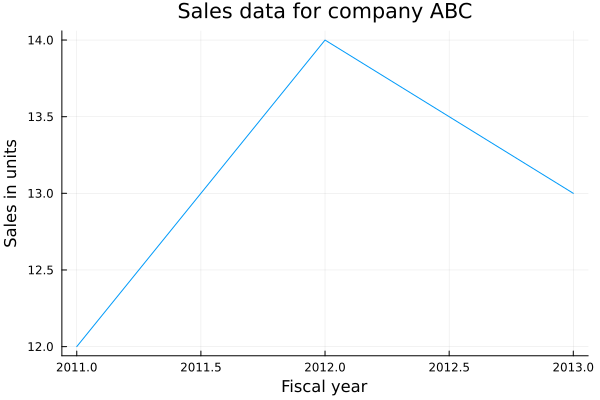

In [67]:
plot(df.date,
     df.sales,
     xlabel=colmetadata(df, :date, "label"),
     ylabel=colmetadata(df, :sales, "label"),
     title=metadata(df, "title"), legend=false)

Metadata is especially useful if you:
* work with multiple data frames that have many columns and it is hard to keep mental track of their interpretation, or
* want to have an automated pipeline (e.g. for producing tables or figures) where custom annotations should be used (as in the examples above)

For more details please refer to https://dataframes.juliadata.org/stable/lib/metadata/ and [TableMetadataTools.jl](https://github.com/JuliaData/TableMetadataTools.jl) package.